In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
# Load dataset
train_dir = "fruits-360/Training"
test_dir = "fruits-360/Test"

# Load training dataset without preprocessing
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset='training',
    batch_size=32,
    image_size=(100, 100),
    seed=42,
    shuffle=True,
)

# Load validation dataset without preprocessing
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    validation_split=0.2,
    subset='validation',
    batch_size=32,
    image_size=(100, 100),
    seed=123,
)

train_datagen = ImageDataGenerator(rescale=1./255, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

train_set = train_datagen.flow_from_directory('fruits-360/Training',
                                              target_size=(224, 224),
                                              batch_size=64,
                                              class_mode='categorical')

val_set = val_datagen.flow_from_directory('fruits-360/Test',
                                          target_size=(224, 224),
                                          batch_size=64,
                                          class_mode='categorical')

# Replace this with the actual path where you saved the weights file
vgg19_weights_path = 'vgg19_weights_tf_dim_ordering_tf_kernels_notop.h5'

# Load the pre-trained VGG19 model without the top classification layer
vgg19 = VGG19(input_shape=[224, 224, 3], weights=vgg19_weights_path, include_top=False)

# Add custom layers on top of VGG19
model = Sequential()
model.add(vgg19)
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(train_set.num_classes, activation="softmax"))

Found 70491 files belonging to 141 classes.
Using 56393 files for training.


2024-10-12 01:51:59.524413: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-10-12 01:51:59.525070: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-10-12 01:51:59.525090: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-10-12 01:51:59.525441: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-10-12 01:51:59.525643: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Found 23619 files belonging to 141 classes.
Using 4723 files for validation.
Found 70491 images belonging to 141 classes.
Found 23619 images belonging to 141 classes.


Epoch 1/8


2024-10-12 01:52:09.091990: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1102/1102 ━━━━━━━━━━━━━━━━━━━━ 2381s 2s/step - accuracy: 0.0241 - loss: 4.8311 - val_accuracy: 0.3854 - val_loss: 3.0641
Epoch 2/8
1102/1102 ━━━━━━━━━━━━━━━━━━━━ 2364s 2s/step - accuracy: 0.3676 - loss: 2.7339 - val_accuracy: 0.8446 - val_loss: 0.6623
Epoch 3/8
1102/1102 ━━━━━━━━━━━━━━━━━━━━ 2352s 2s/step - accuracy: 0.7867 - loss: 0.7875 - val_accuracy: 0.9560 - val_loss: 0.1500
Epoch 4/8
1102/1102 ━━━━━━━━━━━━━━━━━━━━ 2353s 2s/step - accuracy: 0.9038 - loss: 0.3388 - val_accuracy: 0.9565 - val_loss: 0.1529
Epoch 5/8
1102/1102 ━━━━━━━━━━━━━━━━━━━━ 2354s 2s/step - accuracy: 0.9432 - loss: 0.1956 - val_accuracy: 0.9738 - val_loss: 0.0933
Epoch 6/8
1102/1102 ━━━━━━━━━━━━━━━━━━━━ 2353s 2s/step - accuracy: 0.9622 - loss: 0.1301 - val_accuracy: 0.9892 - val_loss: 0.0427
Epoch 7/8
1102/1102 ━━━━━━━━━━━━━━━━━━━━ 2353s 2s/step - accuracy: 0.9701 - loss: 0.0986 - val_accuracy: 0.9903 - val_loss: 0.0413
Epoch 8/8
1102/1102 ━━━━━━━━━━━━━━━━━━━━ 2353s 2s/step - accuracy: 0.9772 - loss: 0.0779 - va

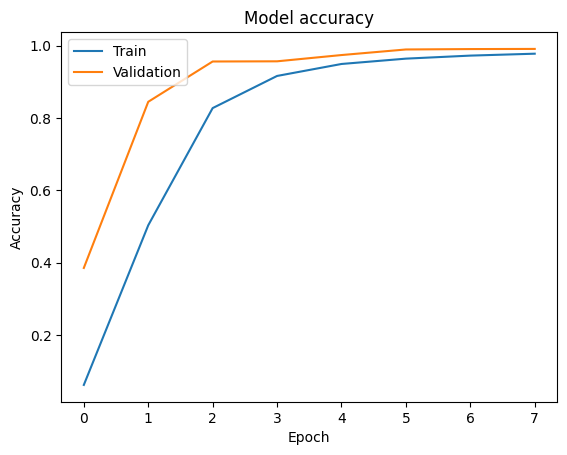

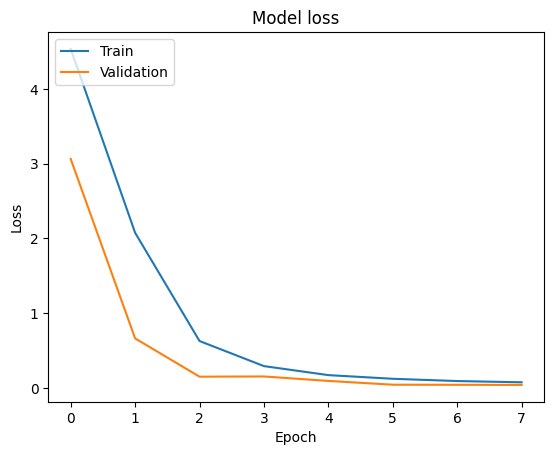

ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=saved_model_fruits360.

In [7]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.optimizers.SGD(learning_rate=0.001),
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_set,
    validation_data=val_set,
    epochs=8,
    verbose=1
)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [8]:
# Save the trained model - choose one or both formats
# Option 1: Save as a .h5 file
model.save('model_fruits360.h5')

# Option 2: Save in TensorFlow SavedModel format
model.save('saved_model_fruits360.keras')

print("Model saved successfully.")

Model saved successfully.


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the copied dataset
train_dir = "fruits-360-fgsm/Training"
test_dir = "fruits-360-fgsm/Test"

# Load training data without preprocessing (for adding noise)
train_datagen = ImageDataGenerator(rescale=1./255)
train_set = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical'
)

# Load the clean validation dataset for evaluation
val_datagen = ImageDataGenerator(rescale=1./255)
val_set = val_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical'
)

Found 75293 images belonging to 141 classes.
Found 23619 images belonging to 141 classes.


In [3]:
def fgsm_attack(model, image, label, epsilon=0.02):
    # Convert image to tensor
    image = tf.convert_to_tensor(image.reshape((1, 224, 224, 3)), dtype=tf.float32)
    
    # Convert the one-hot encoded label to class index
    label_index = np.argmax(label)
    label = tf.convert_to_tensor([label_index], dtype=tf.int64)

    # Use GradientTape to calculate gradients
    with tf.GradientTape() as tape:
        tape.watch(image)
        prediction = model(image)
        loss = tf.keras.losses.sparse_categorical_crossentropy(label, prediction)
    
    # Get the gradient of the loss with respect to the image
    gradient = tape.gradient(loss, image)
    
    # Get the sign of the gradient to create the perturbation
    signed_grad = tf.sign(gradient)
    
    # Create the adversarial example by adding noise
    adversarial_image = image + epsilon * signed_grad
    adversarial_image = tf.clip_by_value(adversarial_image, 0, 1)  # Ensure valid pixel range

    return adversarial_image.numpy().squeeze()

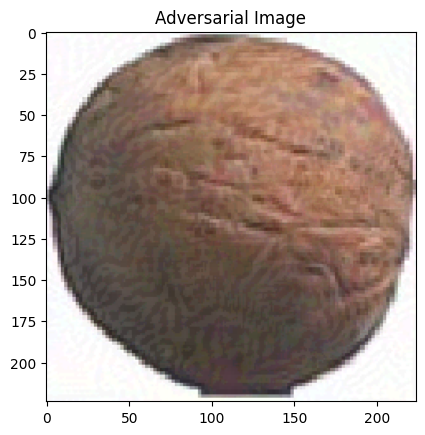

In [18]:
# Example usage:
images, labels = next(iter(train_set))
image = images[0]
label = labels[0]

# Apply FGSM attack
adversarial_image = fgsm_attack(model, image, label, epsilon=0.02)

# Display the adversarial image
import matplotlib.pyplot as plt
plt.imshow(adversarial_image)
plt.title("Adversarial Image")
plt.show()

In [21]:
import os
import random
import numpy as np

# Reverse the class indices to map index back to class name
index_to_class = {v: k for k, v in train_set.class_indices.items()}

# Percentage of data to attack
poison_percentage = 0.1  # For example, 10% of the data
total_images = len(train_set.filenames)
num_poisoned_images = int(total_images * poison_percentage)

# Apply FGSM to a random selection of images from the training set
for _ in range(num_poisoned_images):
    # Select a random batch
    images, labels = next(iter(train_set))
    idx = random.randint(0, len(images) - 1)
    
    image = images[idx]
    label = labels[idx]
    
    # Create adversarial example
    adversarial_image = fgsm_attack(model, image, label, epsilon=0.02)
    
    # Get the class index and corresponding class name
    label_index = np.argmax(label)
    class_label = index_to_class[label_index]
    
    # Save the adversarial image
    save_dir = os.path.join(train_dir, class_label)
    image_name = f"poisoned_{idx}.png"
    tf.keras.preprocessing.image.save_img(os.path.join(save_dir, image_name), adversarial_image)

In [4]:
# Reload the poisoned dataset
train_datagen_poisoned = ImageDataGenerator(rescale=1./255, 
                                            shear_range=0.2, 
                                            zoom_range=0.2, 
                                            horizontal_flip=True)
train_set_poisoned = train_datagen_poisoned.flow_from_directory('fruits-360-fgsm/Training',
                                                                target_size=(224, 224),
                                                                batch_size=64,
                                                                class_mode='categorical')

# Reload the clean test set (validation set)
val_set = val_datagen.flow_from_directory('fruits-360-fgsm/Test',
                                          target_size=(224, 224),
                                          batch_size=64,
                                          class_mode='categorical')

# Replace this with the actual path where you saved the weights file
vgg19_weights_path = 'vgg19_weights_tf_dim_ordering_tf_kernels_notop.h5'

# Load the pre-trained VGG19 model without the top classification layer
vgg19 = VGG19(input_shape=[224, 224, 3], weights=vgg19_weights_path, include_top=False)

# Add custom layers on top of VGG19
model_poisoned = Sequential()
model_poisoned.add(vgg19)
model_poisoned.add(Flatten())
model_poisoned.add(Dense(512, activation="relu"))
model_poisoned.add(Dense(256, activation="relu"))
model_poisoned.add(Dropout(0.3))
model_poisoned.add(Dense(128, activation="relu"))
model_poisoned.add(Dropout(0.3))
model_poisoned.add(Dense(train_set.num_classes, activation="softmax"))

Found 75293 images belonging to 141 classes.
Found 23619 images belonging to 141 classes.


2024-10-14 15:30:38.443021: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-10-14 15:30:38.443063: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-10-14 15:30:38.443078: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-10-14 15:30:38.443097: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-10-14 15:30:38.443112: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/8


2024-10-14 15:30:43.128072: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1177/1177 ━━━━━━━━━━━━━━━━━━━━ 2706s 2s/step - accuracy: 0.0708 - loss: 4.5406 - val_accuracy: 0.8251 - val_loss: 0.8852
Epoch 2/8
1177/1177 ━━━━━━━━━━━━━━━━━━━━ 2661s 2s/step - accuracy: 0.7530 - loss: 0.9297 - val_accuracy: 0.9577 - val_loss: 0.1719
Epoch 3/8
1177/1177 ━━━━━━━━━━━━━━━━━━━━ 11050s 9s/step - accuracy: 0.9326 - loss: 0.2327 - val_accuracy: 0.9721 - val_loss: 0.1147
Epoch 4/8
1177/1177 ━━━━━━━━━━━━━━━━━━━━ 2723s 2s/step - accuracy: 0.9651 - loss: 0.1179 - val_accuracy: 0.9735 - val_loss: 0.1321
Epoch 5/8
1177/1177 ━━━━━━━━━━━━━━━━━━━━ 2694s 2s/step - accuracy: 0.9758 - loss: 0.0839 - val_accuracy: 0.9806 - val_loss: 0.0950
Epoch 6/8
1177/1177 ━━━━━━━━━━━━━━━━━━━━ 2693s 2s/step - accuracy: 0.9797 - loss: 0.0670 - val_accuracy: 0.9856 - val_loss: 0.0746
Epoch 7/8
1177/1177 ━━━━━━━━━━━━━━━━━━━━ 2692s 2s/step - accuracy: 0.9835 - loss: 0.0513 - val_accuracy: 0.9846 - val_loss: 0.0773
Epoch 8/8
1177/1177 ━━━━━━━━━━━━━━━━━━━━ 2716s 2s/step - accuracy: 0.9874 - loss: 0.0427 - v

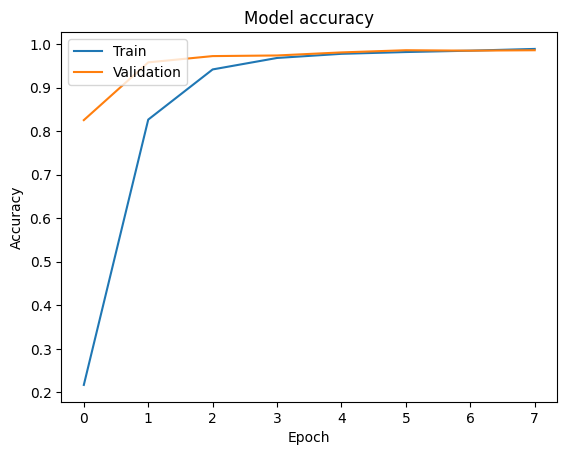

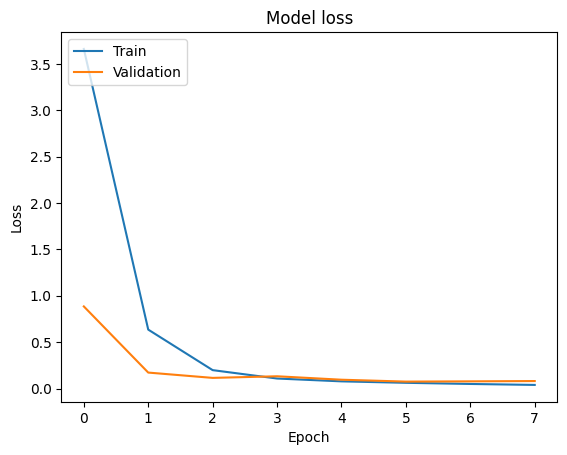

In [5]:
model_poisoned.compile(
    loss='categorical_crossentropy',
    optimizer=tf.optimizers.SGD(learning_rate=0.001),
    metrics=['accuracy']
)

# Train the model
history = model_poisoned.fit(
    train_set,
    validation_data=val_set,
    epochs=8,
    verbose=1
)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [7]:
test_set = val_datagen.flow_from_directory('fruits-360-fgsm/Test',
                                           target_size=(224, 224),
                                           batch_size=32,
                                           class_mode='categorical')

# Evaluate the model on test data
test_loss, test_acc = model_poisoned.evaluate(test_set)
print(f"Test Accuracy: {test_acc*100:.2f}%")

Found 23619 images belonging to 141 classes.
739/739 ━━━━━━━━━━━━━━━━━━━━ 224s 302ms/step - accuracy: 0.9860 - loss: 0.0769
Test Accuracy: 98.55%
